In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt

In [42]:
filename = "data/twitter_training.csv"
df = pd.read_csv(filename)
df.columns = ['Header1', 'company','labels','text']

In [43]:
print(df.shape)
df.head(5)

(74681, 4)


,Header1,company,labels,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [44]:
df.isna().sum()

Header1      0
company      0
labels       0
text       686
dtype: int64

In [45]:
df = df.dropna()
df.isnull().values.any()
print(df.shape)

(73995, 4)


In [46]:
N = 10000
texts = df.values[:N, 3].astype(str)
y = df.values[:N, 2]
print(texts[:3])
print(y[:3])


['I am coming to the borders and I will kill you all,'
 'im getting on borderlands and i will kill you all,'
 'im coming on borderlands and i will murder you all,']
['Positive' 'Positive' 'Positive']


In [47]:
from keras.preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts(texts)

In [48]:
X = t.texts_to_matrix(texts, mode= 'binary') #frequent, count, tfidf, 
print(X.shape)
print(X[:3])

(10000, 9431)
[[0. 1. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= .25)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 9431)
(2500, 9431)
(7500,)
(2500,)


In [50]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Snape\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.91      0.88      0.89       468
    Negative       0.92      0.91      0.91       530
     Neutral       0.94      0.88      0.91       624
    Positive       0.87      0.94      0.91       878

    accuracy                           0.91      2500
   macro avg       0.91      0.90      0.91      2500
weighted avg       0.91      0.91      0.91      2500



In [52]:
question = input()
X_input = t.texts_to_matrix([question], mode= 'count')
print(X_input)

y_output = model.predict(X_input)
print(y_output)

[[0. 0. 0. ... 0. 0. 0.]]
['Positive']


## frequent <> count

In [53]:
X_fre = t.texts_to_matrix(texts, mode= 'freq') #frequent, count, tfidf, 
print(X_fre.shape)
print(X_fre[:3])

(10000, 9431)
[[0.         0.08333333 0.16666667 ... 0.         0.         0.        ]
 [0.         0.         0.1        ... 0.         0.         0.        ]
 [0.         0.         0.1        ... 0.         0.         0.        ]]


In [54]:
X_count = t.texts_to_matrix(texts, mode= 'count') #frequent, count, tfidf, 
print(X_count.shape)
print(X_count[:3])

(10000, 9431)
[[0. 1. 2. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [55]:
X_tf = t.texts_to_matrix(texts, mode= 'tfidf')
print(X_tf.shape)
print(X_tf[:3])

(10000, 9431)
[[0.         1.24637136 2.51579481 ... 0.         0.         0.        ]
 [0.         0.         1.48586894 ... 0.         0.         0.        ]
 [0.         0.         1.48586894 ... 0.         0.         0.        ]]


# Assignment


    - 'count': Đếm số lần xuất hiện của từng từ trong văn bản. Mỗi từ đại diện cho một cột trong ma trận đầu ra, và giá trị tại một cột xác định là số lần từ đó xuất hiện trong văn bản.
    - 'binary': Tương tự như 'count', nhưng thay vì đếm số lần xuất hiện, nó chỉ đơn giản là đánh dấu sự hiện diện (1) hoặc vắng mặt (0) của mỗi từ.
    - 'freq': Tính tần suất xuất hiện của mỗi từ trong một văn bản. Điều này khác với 'count' ở chỗ giá trị được chuẩn hóa bằng cách chia cho tổng số từ trong văn bản, do đó, cho ta biết độ quan trọng tương đối của mỗi từ trong văn bản.
    - 'tfidf': Đây là viết tắt của "Term Frequency-Inverse Document Frequency". Nó không chỉ xem xét tần suất xuất hiện của từ trong văn bản (như 'freq'), mà còn xem xét tần suất xuất hiện của từ trong toàn bộ tập dữ liệu. Nếu một từ xuất hiện thường xuyên trong một văn bản nhưng hiếm khi xuất hiện trong các văn bản khác, nó sẽ nhận được một giá trị TF-IDF cao, cho thấy nó có thể mang lại nhiều thông tin về nội dung của văn bản.

In [56]:
# Define modes and models
modes = ['binary', 'count', 'tfidf', 'freq']  # Note: 'freq' is equivalent to 'count' mode
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}
list_accuracy = []
# Initialize dictionaries to store average accuracies
average_accuracies = {model_name: 0 for model_name in models}

for mode_idx, mode in enumerate(modes, start=1):
    X = t.texts_to_matrix(texts, mode=mode)

    print(f"\n{mode_idx}. Mode: {mode}")
    print(f"Shape of X: {X.shape}")
    print(f"Example of X:\n{X[:3]}")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
    modes_accuracy = []
    # Train and evaluate each model
    for model_name, model in models.items():
        print(f"\nTraining {model_name} with mode {mode}:")
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        modes_accuracy.append(accuracy)
        # Aggregate accuracy
        average_accuracies[model_name] += accuracy
        
        print(classification_report(y_test, y_pred))
        
    list_accuracy.append(modes_accuracy)

# Calculate average accuracy
total_modes = len(modes)
for model_name in average_accuracies:
    average_accuracies[model_name] /= total_modes

print(list_accuracy)


1. Mode: binary
Shape of X: (10000, 9431)
Example of X:
[[0. 1. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]

Training Logistic Regression with mode binary:


c:\Users\Snape\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

  Irrelevant       0.91      0.88      0.89       468
    Negative       0.92      0.91      0.91       530
     Neutral       0.94      0.88      0.91       624
    Positive       0.87      0.94      0.91       878

    accuracy                           0.91      2500
   macro avg       0.91      0.90      0.91      2500
weighted avg       0.91      0.91      0.91      2500


Training Naive Bayes with mode binary:
              precision    recall  f1-score   support

  Irrelevant       0.86      0.76      0.81       468
    Negative       0.84      0.90      0.87       530
     Neutral       0.91      0.73      0.81       624
    Positive       0.80      0.93      0.86       878

    accuracy                           0.84      2500
   macro avg       0.85      0.83      0.84      2500
weighted avg       0.85      0.84      0.84      2500


Training K-Nearest Neighbors with mode binary:
              precision    recall  f1-scor

c:\Users\Snape\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

  Irrelevant       0.91      0.88      0.90       468
    Negative       0.92      0.90      0.91       530
     Neutral       0.94      0.88      0.90       624
    Positive       0.87      0.94      0.91       878

    accuracy                           0.90      2500
   macro avg       0.91      0.90      0.90      2500
weighted avg       0.91      0.90      0.90      2500


Training Naive Bayes with mode count:
              precision    recall  f1-score   support

  Irrelevant       0.86      0.76      0.80       468
    Negative       0.83      0.89      0.86       530
     Neutral       0.89      0.72      0.80       624
    Positive       0.80      0.92      0.85       878

    accuracy                           0.83      2500
   macro avg       0.84      0.82      0.83      2500
weighted avg       0.84      0.83      0.83      2500


Training K-Nearest Neighbors with mode count:
              precision    recall  f1-score 

c:\Users\Snape\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

  Irrelevant       0.89      0.88      0.89       468
    Negative       0.91      0.91      0.91       530
     Neutral       0.92      0.92      0.92       624
    Positive       0.91      0.91      0.91       878

    accuracy                           0.91      2500
   macro avg       0.91      0.91      0.91      2500
weighted avg       0.91      0.91      0.91      2500


Training Naive Bayes with mode tfidf:
              precision    recall  f1-score   support

  Irrelevant       0.83      0.86      0.84       468
    Negative       0.87      0.90      0.88       530
     Neutral       0.92      0.81      0.86       624
    Positive       0.86      0.90      0.88       878

    accuracy                           0.87      2500
   macro avg       0.87      0.87      0.87      2500
weighted avg       0.87      0.87      0.87      2500


Training K-Nearest Neighbors with mode tfidf:
              precision    recall  f1-score 

c:\Users\Snape\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

  Irrelevant       0.66      0.18      0.28       468
    Negative       0.64      0.50      0.56       530
     Neutral       0.58      0.62      0.60       624
    Positive       0.57      0.83      0.67       878

    accuracy                           0.59      2500
   macro avg       0.61      0.53      0.53      2500
weighted avg       0.60      0.59      0.56      2500


Training Naive Bayes with mode freq:
              precision    recall  f1-score   support

  Irrelevant       0.80      0.02      0.03       468
    Negative       0.89      0.12      0.22       530
     Neutral       0.92      0.29      0.44       624
    Positive       0.39      0.99      0.56       878

    accuracy                           0.45      2500
   macro avg       0.75      0.36      0.31      2500
weighted avg       0.70      0.45      0.36      2500


Training K-Nearest Neighbors with mode freq:
              precision    recall  f1-score   

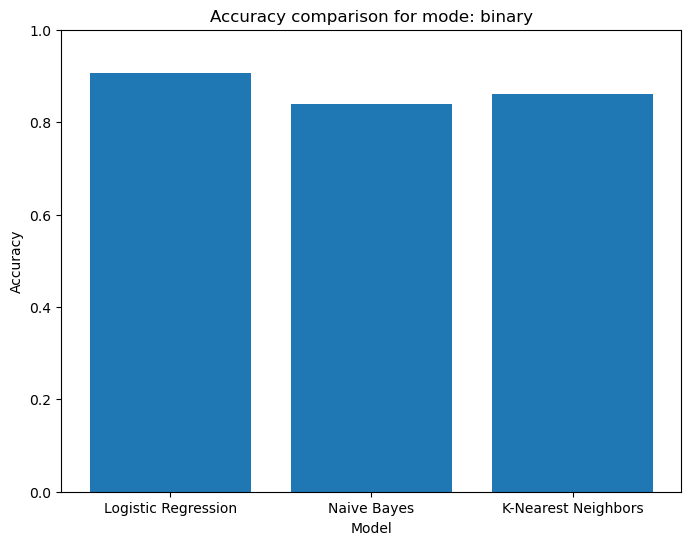

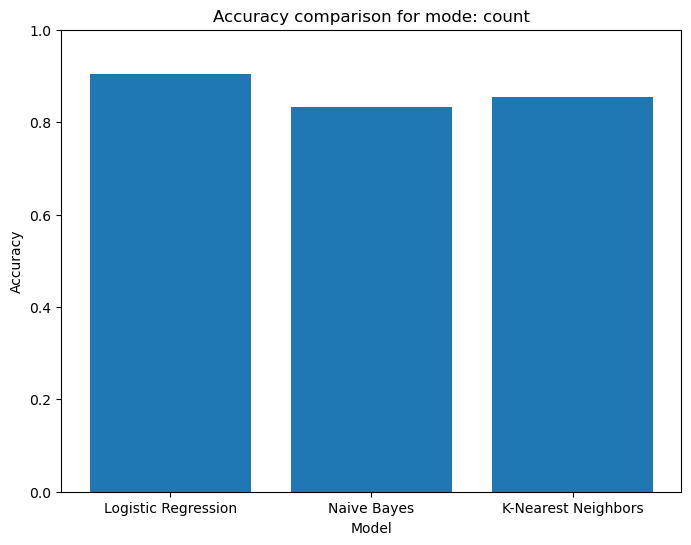

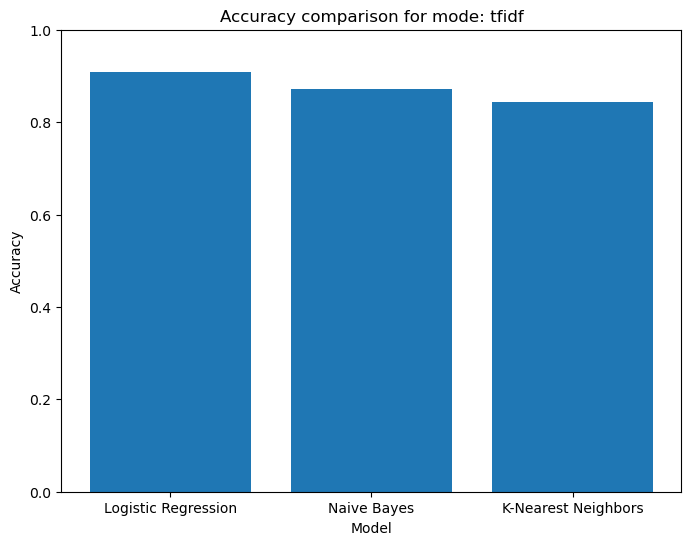

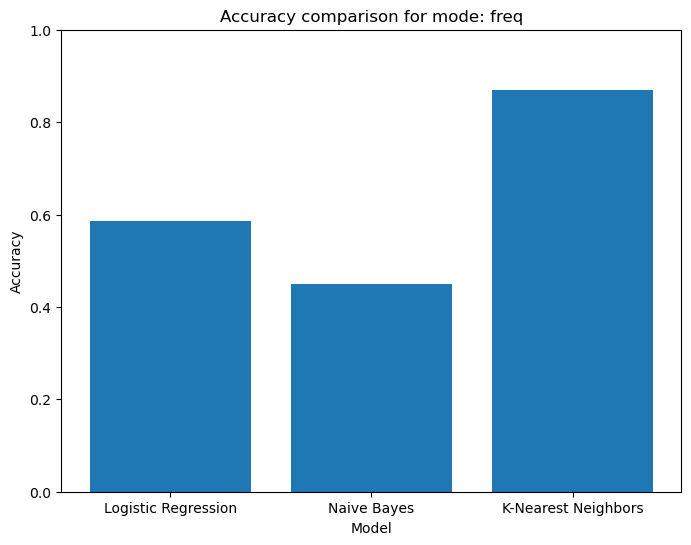

In [57]:
models = ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors']

# List of accuracies for each mode and model
# Plotting
for i, mode in enumerate(modes):
    plt.figure(figsize=(8, 6))
    plt.bar(models, list_accuracy[i])
    plt.title(f'Accuracy comparison for mode: {mode}')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.show()

In [58]:
# Print average accuracies
print("\nAverage Accuracies:")
for model_name, accuracy in average_accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")


Average Accuracies:
Logistic Regression: 0.8259
Naive Bayes: 0.7483
K-Nearest Neighbors: 0.8572
